# FIXED COUPON BOND EXAMPLE TREASURY CUSIP 91282CFX4

This is a US Treasury bond analysis based on example in https://data.bloomberglp.com/bat/sites/3/2017/07/SF-2017_Paul-Fjeldsted.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import financepy

####################################################################
# FINANCEPY BETA Version 0.260 - This build:  22 Nov 2022 at 13:42 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [6]:
from financepy.utils import *
from financepy.products.bonds import *

# Define the Bond

In [14]:
issue_date = Date(30, 11, 2022)
settle_date = Date(6, 2, 2023)
maturity_date = Date(30, 11, 2024)
coupon = 0.045
freq_type = FrequencyTypes.SEMI_ANNUAL
accrual_type = DayCountTypes.ACT_ACT_ICMA
face = 100.0

In [15]:
bond = Bond(issue_date, maturity_date, coupon, freq_type, accrual_type, face)

In [16]:
clean_price = 100+4/16  # if face is 1 then this must be 0.99780842

You can get information about the bond using the print method.

In [17]:
print(bond)

OBJECT TYPE: Bond
ISSUE DATE: 30-NOV-2022
MATURITY DATE: 30-NOV-2024
COUPON (%): 4.5
FREQUENCY: FrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: DayCountTypes.ACT_ACT_ICMA
FACE AMOUNT: 100.0


## Bond Cash Flows

We first need to set the settlement date of the bond. 

In [18]:
print(bond.coupon_dates(settle_date))

 30-MAY-2023         2.25 
 30-NOV-2023         2.25 
 30-MAY-2024         2.25 
 30-NOV-2024       102.25 



The convention is to use these dates for yield calculations even if some fall on weekends.

## Bond Yield Measures

Current yield is the coupon over the price

In [9]:
print("Current Yield %12.7f %%" % (bond.current_yield(clean_price)*100))

Current Yield    2.3802164 %


In [10]:
calcTypes = [YTMCalcType.UK_DMO, YTMCalcType.US_STREET, YTMCalcType.US_TREASURY]

Yield to maturity using different conventions

In [11]:
for ytmCalcType in calcTypes:
    y = bond.yield_to_maturity(settlement_date, clean_price, ytmCalcType)
    print("%30s %12.7f" % (ytmCalcType, y*100))

            YTMCalcType.UK_DMO    2.4000000
         YTMCalcType.US_STREET    2.4000000
       YTMCalcType.US_TREASURY    2.3998103


## Vectorizations

Some bond function such as yield to maturity support vectorisation

In [12]:
clean_prices = np.linspace(70,150,20)

In [13]:
ylds = bond.yield_to_maturity(settlement_date, clean_prices, YTMCalcType.US_TREASURY)

Text(0, 0.5, 'Clean Prices')

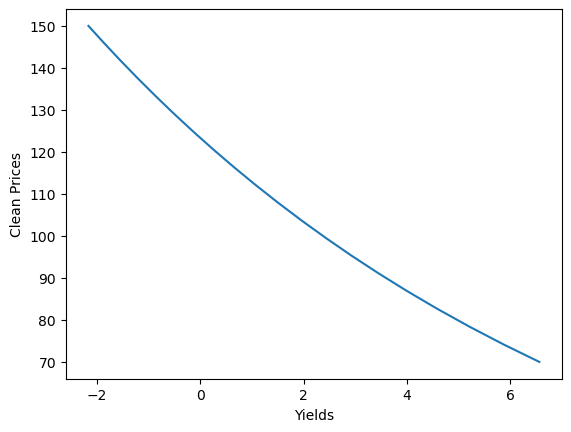

In [14]:
plt.plot(ylds*100.0, clean_prices)
plt.xlabel("Yields")
plt.ylabel("Clean Prices")

In [15]:
clean_pricesOut = bond.clean_price_from_ytm(settlement_date, ylds, YTMCalcType.US_TREASURY)

In [16]:
np.round(clean_pricesOut - clean_prices,9)

array([ 0., -0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0.,
       -0.,  0.,  0., -0., -0.,  0.,  0.])

And so we recover the initial input clean prices to 9 decimal places.

## Accrued Interest

For consistency let's fix the yield calculation convention to be US Treasury

In [17]:
yieldConvention = YTMCalcType.US_TREASURY

In [18]:
ytm = bond.yield_to_maturity(settlement_date, clean_price, yieldConvention)

Full price is the clean price plus accrued interest

In [19]:
print("Full Price = %12.7f" % bond.full_price_from_ytm(settlement_date, ytm, yieldConvention))

Full Price =  100.2132466


In [20]:
print("Clean Price = %12.7f" % bond.clean_price_from_ytm(settlement_date, ytm, yieldConvention))

Clean Price =   99.7808417


Accrued interest is accrued from previous coupon date to settlement date

In [21]:
print("Previous coupon date is ", bond._pcd)

Previous coupon date is  15-MAY-2017


In [22]:
print("Settlement date is ", settlement_date)

Settlement date is  21-JUL-2017


The amount of accrued interest is 

In [23]:
print("Accrued = %12.2f" % bond._accrued_interest)

Accrued =      4324.05


This is based on the following number of days of accrual

In [24]:
print("Accrued Days = %d" % bond._accrued_days)

Accrued Days = 67


In [25]:
print("Principal = %12.2f" % bond.principal(settlement_date, ytm, yieldConvention))

Principal =    997808.42


## Bond Risk Measures

The bond dollar duration is the actual derivative with respect to the yield. It is the bond price change for a 1bp drop in the yield-to-maturity divided by 1bp.

In [26]:
duration = bond.dollar_duration(settlement_date, ytm, yieldConvention)
print("Dollar Duration = ", duration)

Dollar Duration =  869.2156049457367


Modified Duration divides the dollar duration by the full price of the bond

In [27]:
modified_duration = bond.modified_duration(settlement_date, ytm, yieldConvention)
print("Modified Duration = ", modified_duration)

Modified Duration =  8.673659765665757


Macauley Duration multiplies the dollar duration by (1+y/f) and divides by the full price

In [28]:
macauley_duration = bond.macauley_duration(settlement_date, ytm, yieldConvention)
print("Macauley Duration = ", macauley_duration)

Macauley Duration =  8.777735455427267


Convexity is the second derivative of the bond price with respect to the yield-to-maturity

In [29]:
conv = bond.convexity_from_ytm(settlement_date, ytm, yieldConvention)
print("Convexity = ", conv)

Convexity =  0.8513814741403719


Copyright (c) 2020 Dominic O'Kane